In [176]:
!python --version

Python 3.8.15


In [177]:
from platform import python_version
print(python_version())

3.8.15


In [178]:
import pandas as pd
import tensorflow as tf
import numpy as np
import sklearn
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder 

In [179]:
print(pd.__version__)
print(tf.__version__)
print(np.__version__)
print(sklearn.__version__)

1.3.5
2.10.0
1.21.6
0.24.2


In [180]:
train_df = pd.read_csv("Dataset/data.csv")
train_df.columns = ['sentence', 'language']
train_df.head()

,sentence,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch


In [181]:
# Convert all values in the 'language' column to lowercase
train_df['language'] = train_df['language'].str.lower()

# Display the first few rows to verify
train_df.head()

,sentence,language
0,klement gottwaldi surnukeha palsameeriti ning ...,estonian
1,sebes joseph pereira thomas på eng the jesuit...,swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,tamil
4,de spons behoort tot het geslacht haliclona en...,dutch


In [182]:
train_df['language'].value_counts()

spanish       1966
persian       1889
french        1868
english       1836
chinese       1000
arabic        1000
russian       1000
romanian      1000
pushto        1000
hindi         1000
korean        1000
estonian      1000
swedish       1000
portugese     1000
indonesian    1000
urdu          1000
latin         1000
turkish       1000
japanese      1000
dutch         1000
tamil         1000
thai          1000
italian        963
Name: language, dtype: int64

In [183]:
train_df['language'].unique()

array(['estonian', 'swedish', 'thai', 'tamil', 'dutch', 'japanese',
       'turkish', 'latin', 'urdu', 'indonesian', 'portugese', 'french',
       'chinese', 'korean', 'hindi', 'spanish', 'pushto', 'persian',
       'romanian', 'russian', 'english', 'arabic', 'italian'],
      dtype=object)

In [184]:
train_df.shape

(26522, 2)

In [185]:
num_classes = len(train_df.language.unique())
num_classes

23

The expression `r'[^\w\s]'` is a **regular expression** (regex) used to match characters based on specific rules. Here's a breakdown of its components:

1. **`[ ]`**: Denotes a character set. This matches any single character that is specified inside the brackets.

2. **`^` (caret)**: Inside a character set, the `^` negates the set. This means it will match any character *not* specified inside the brackets.

3. **`\w`**: Matches any **word character**, which includes:
   - Letters (`a-z`, `A-Z`)
   - Digits (`0-9`)
   - The underscore (`_`)

4. **`\s`**: Matches any **whitespace character**, including spaces, tabs, and newlines.

5. **`[^\w\s]`**: Matches any character that is *not* a word character or a whitespace character. Essentially, it matches **punctuation, special characters, or symbols**.

6. **`regex=True`**: Indicates that the replacement should interpret the pattern as a regular expression.

### Purpose:
In this context, the code `str.replace('[^\w\s]', '', regex=True)` replaces all non-word and non-whitespace characters (e.g., punctuation like `!`, `?`, `.`, etc.) with an empty string (`''`). This effectively removes punctuation and special symbols from the text.

In [186]:
# Convert all characters in the 'sentence' column to lowercase and store in a new column 'sentence_lower'
train_df['sentence_lower'] = train_df["sentence"].str.lower()

# Remove all punctuation from the 'sentence_lower' column using a regex pattern and store in a new column 'sentence_no_punctuation'
train_df['sentence_no_punctuation'] = train_df['sentence_lower'].str.replace('[^\w\s]', '', regex=True)

# Replace any NaN values in the 'sentence_no_punctuation' column with the string "fillna"
train_df['sentence_no_punctuation'] = train_df["sentence_no_punctuation"].fillna("fillna")

In [187]:
train_df.iloc[0]

sentence                   klement gottwaldi surnukeha palsameeriti ning ...
language                                                            estonian
sentence_lower             klement gottwaldi surnukeha palsameeriti ning ...
sentence_no_punctuation    klement gottwaldi surnukeha palsameeriti ning ...
Name: 0, dtype: object

In [188]:
# Extract the 'language' column from the DataFrame and assign it to the variable Y (target labels)
Y = train_df['language']

print(Y)
# Create an instance of the LabelEncoder, which is used to convert categorical labels into numeric format
encoder = LabelEncoder()

# Fit the LabelEncoder to the unique values in Y and transform them into numeric codes
Y = encoder.fit_transform(Y)

# Display the transformed labels (now numeric values instead of original categorical labels)
print(Y)

0        estonian
1         swedish
2            thai
3           tamil
4           dutch
           ...   
26517     persian
26518     persian
26519     persian
26520     persian
26521     persian
Name: language, Length: 26522, dtype: object
[ 4 18 20 ... 12 12 12]


In [189]:
encoder.classes_

array(['arabic', 'chinese', 'dutch', 'english', 'estonian', 'french',
       'hindi', 'indonesian', 'italian', 'japanese', 'korean', 'latin',
       'persian', 'portugese', 'pushto', 'romanian', 'russian', 'spanish',
       'swedish', 'tamil', 'thai', 'turkish', 'urdu'], dtype=object)

In [190]:
num_classes

23

In [191]:
# Convert the numeric labels (Y) into one-hot encoded vectors using TensorFlow's utility function
Y = tf.keras.utils.to_categorical(
    Y,  # The array of numeric labels to be one-hot encoded
    num_classes=num_classes  # The total number of unique classes (defines the one-hot vector size)
)

# Display the one-hot encoded labels
Y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [192]:
max_features = 20000 # we set maximum number of words to 20000
maxlen = 500 # we set maximum sequence length to 400

In [193]:
# Create an instance of TensorFlow's Tokenizer, which is used for text tokenization
tok = tf.keras.preprocessing.text.Tokenizer(num_words = max_features, char_level=False)

# Fit the Tokenizer on the cleaned text from the 'sentence_no_punctuation' column
# This step builds the vocabulary (word index) based on the text data
tok.fit_on_texts(list(train_df['sentence_no_punctuation']))  # Convert the text column to a list for processing

In [194]:
len(tok.word_index)

304055

In [195]:
vocab_size = len(tok.word_index) + 1 

```python
# Calculate the vocabulary size by counting the unique words in the Tokenizer's word index and adding 1
# This represents the total number of words to be tokenized, including a reserved index (e.g., for padding)
vocab_size = len(tok.word_index) + 1 
```

### Explanation:
- **`tok.word_index`**: 
  - This is a dictionary created by the `Tokenizer`, where keys are words, and values are their corresponding unique integer IDs.
  - Example: `{'hello': 1, 'world': 2}` if "hello" and "world" are in the text.

- **`len(tok.word_index)`**: 
  - Counts the number of unique words in the vocabulary.

- **`+ 1`**: 
  - Adds 1 to the vocabulary size to account for a reserved token (usually `0`), which is often used for **padding** or other purposes.

In [196]:
train_df.loc[0, 'sentence_no_punctuation']

'klement gottwaldi surnukeha palsameeriti ning paigutati mausoleumi surnukeha oli aga liiga hilja ja oskamatult palsameeritud ning hakkas ilmutama lagunemise tundemärke  aastal viidi ta surnukeha mausoleumist ära ja kremeeriti zlíni linn kandis aastatel  nime gottwaldov ukrainas harkivi oblastis kandis zmiivi linn aastatel  nime gotvald'

In [197]:
train_df.loc[0, 'language']

'estonian'

In [198]:
# Convert each sentence in the 'sentence_no_punctuation' column to a sequence of integers (tokens)
# based on the word index built by the Tokenizer
train_df = tok.texts_to_sequences(list(train_df['sentence_no_punctuation'])) 

In [199]:
train_df[0]

[18248,
 362,
 18248,
 303,
 1760,
 82,
 362,
 11654,
 374,
 247,
 18248,
 7220,
 82,
 8966,
 2910,
 4744,
 8966,
 2910,
 4744]

In [200]:
# Pad all sequences in 'train_df' to a fixed length defined by 'maxlen'
# Padding is applied to the beginning ('pre') of sequences shorter than 'maxlen'
train_df = tf.keras.preprocessing.sequence.pad_sequences(
    train_df,  # List of tokenized sequences
    maxlen=maxlen,  # Desired fixed length for all sequences
    padding='pre'  # Add padding to the start of each sequence
)

In [201]:
train_df[0]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [202]:
from sklearn.model_selection import train_test_split # divide into train and test set

X_train, X_test, y_train, y_test = train_test_split(train_df, Y, test_size=0.2, random_state=42)

### Explanation of Each Layer:

1. **Embedding Layer**:
   - **Purpose**: Converts tokenized word indices into dense vector representations (embeddings).
   - **Key Parameters**:
     - **`input_dim=vocab_size`**: Size of the vocabulary. This defines how many unique tokens are in the dataset (including padding).
     - **`output_dim=embedding_dim`**: The dimensionality of each word vector. We set it to 300, meaning each word is represented as a 300-dimensional dense vector.
     - **`input_length=maxlen`**: Specifies the length of input sequences. This ensures the output of the embedding layer has a consistent shape.
   - **Output Shape**: `(batch_size, maxlen, embedding_dim)`.

2. **Flatten Layer**:
   - **Purpose**: Converts the 3D tensor output of the embedding layer into a 1D vector for input into the dense layer.
   - **Input Shape**: `(batch_size, maxlen, embedding_dim)`.
   - **Output Shape**: `(batch_size, maxlen * embedding_dim)`.

3. **Dense Layer**:
   - **Purpose**: Produces the final predictions for each class.
   - **Key Parameters**:
     - **`num_classes`**: The number of unique output classes.
     - **`activation='softmax'`**: Ensures the output is a probability distribution across classes, suitable for multi-class classification.
   - **Output Shape**: `(batch_size, num_classes)`.

In [203]:
num_classes

23

In [204]:
# Set the embedding vector dimension size
embedding_dim = 300

# Define a sequential model (stack layers sequentially)
model = tf.keras.models.Sequential([

    # Embedding layer: Converts integer sequences to dense vector representations
    tf.keras.layers.Embedding(
        input_dim=vocab_size,  # Size of the vocabulary (number of unique tokens + 1)
        output_dim=embedding_dim,  # Dimension of the embedding vectors
        input_length=maxlen  # Length of input sequences (padded to maxlen)
    ),
    
    # Flatten layer: Flattens the output of the embedding layer into a 1D vector
    tf.keras.layers.Flatten(),
    
    # Dense (fully connected) layer: Outputs predictions for each class
    tf.keras.layers.Dense(
        num_classes,  # Number of output classes
        activation='softmax'  # Activation function for multi-class classification
    )
])

In [205]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=[
        'accuracy',  # Built-in accuracy metric
        tf.keras.metrics.Precision(),  # Precision metric
        tf.keras.metrics.Recall()  # Recall metric
    ]
)

### Explanation of the Model Compilation Code

### **Components**
#### 1. **`optimizer='adam'`**
- **Adam Optimizer**:
  - Combines the benefits of **Adaptive Gradient Algorithm (AdaGrad)** and **Root Mean Square Propagation (RMSProp)**.
  - Efficient for handling sparse gradients and non-stationary objectives.
  - Automatically adjusts the learning rate during training.

---

#### 2. **`loss='categorical_crossentropy'`**
- **Categorical Cross-Entropy Loss**:
  - Used for multi-class classification problems where labels are one-hot encoded.
  - Measures the difference between the predicted probability distribution and the true distribution.
    
---

#### 3. **`metrics`**
- A list of metrics to evaluate during training and validation. These do not affect the training process directly but are used for monitoring model performance.

1. **`accuracy`**:
   - Measures the percentage of correct predictions.
   - For multi-class classification, it checks if the predicted class (highest softmax probability) matches the true class.

2. **`tf.keras.metrics.Precision()`**:
   - **Precision** measures the proportion of true positive predictions among all positive predictions.
   - Indicates how many of the predicted positive labels were correct.

3. **`tf.keras.metrics.Recall()`**:
   - **Recall** (also called Sensitivity or True Positive Rate) measures the proportion of true positive predictions among all actual positives.
   - Indicates how well the model captures all relevant instances.

---

### **Summary**
- This configuration optimizes the model with Adam, calculates loss using categorical cross-entropy, and evaluates performance using **accuracy**, **precision**, and **recall**.
- These metrics help monitor the model's effectiveness for classification tasks and provide insights into its ability to make accurate predictions while balancing false positives and false negatives.


In [206]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 300)          91216800  
                                                                 
 flatten_1 (Flatten)         (None, 150000)            0         
                                                                 
 dense_1 (Dense)             (None, 23)                3450023   
                                                                 
Total params: 94,666,823
Trainable params: 94,666,823
Non-trainable params: 0
_________________________________________________________________


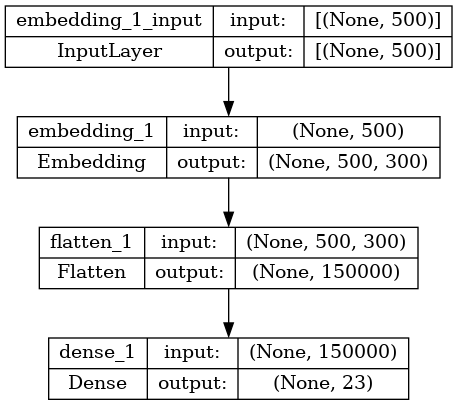

In [207]:
from tensorflow.keras.utils import plot_model
plot_model(
    model, 
    to_file='Model/model_structure.png',  # Save the image to this file
    show_shapes=True,              # Display the output shapes of each layer
    show_layer_names=True,         # Display the layer names
    dpi=96                         # Adjust the resolution
)

In [30]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
664/664 [==============================] - 1528s 2s/step - loss: 0.1541 - accuracy: 0.9406 - precision: 0.9754 - recall: 0.9111
Epoch 2/10
664/664 [==============================] - 1538s 2s/step - loss: 0.1005 - accuracy: 0.9540 - precision: 0.9758 - recall: 0.9360
Epoch 3/10
664/664 [==============================] - 1524s 2s/step - loss: 0.0880 - accuracy: 0.9587 - precision: 0.9793 - recall: 0.9405
Epoch 4/10
664/664 [==============================] - 1523s 2s/step - loss: 0.0860 - accuracy: 0.9575 - precision: 0.9762 - recall: 0.9419
Epoch 5/10
664/664 [==============================] - 1522s 2s/step - loss: 0.0881 - accuracy: 0.9565 - precision: 0.9753 - recall: 0.9427
Epoch 6/10
664/664 [==============================] - 1520s 2s/step - loss: 0.0835 - accuracy: 0.9572 - precision: 0.9759 - recall: 0.9440
Epoch 7/10
664/664 [==============================] - 1565s 2s/step - loss: 0.0838 - accuracy: 0.9586 - precision: 0.9750 - recall: 0.9452
Epoch 8/10
664/664 [=======

In [31]:
model.save('Model/model.h5')
model.save('Model/model')

INFO:tensorflow:Assets written to: Model/model/assets


In [210]:
model = tf.keras.models.load_model('Model/model.h5')

In [211]:
# Evaluate the model
results = model.evaluate(X_test, y_test, verbose=1)
results

166/166 [==============================] - 1s 6ms/step - loss: 0.1967 - accuracy: 0.9389 - precision: 0.9827 - recall: 0.9010


[0.1967165768146515, 0.938925564289093, 0.9827302694320679, 0.9010367393493652]

F1-Score: 0.9401
166/166 [==============================] - 1s 5ms/step


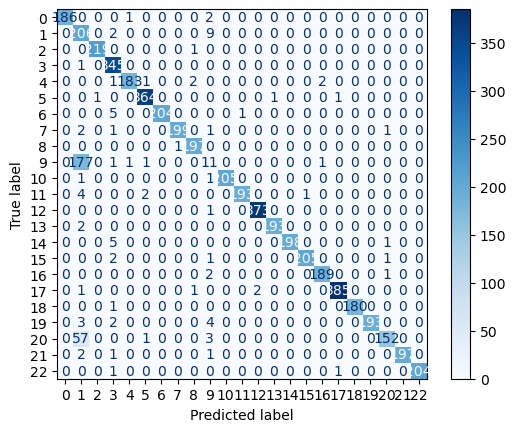

In [212]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

precision = results[2]
recall = results[3]

# Calculate F1-Score
f1_score = 2 * (precision * recall) / (precision + recall)
print(f"F1-Score: {f1_score:.4f}")

# Get predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Compute and plot confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')

In [213]:
# Print all classes
print("Classes:", encoder.classes_)

Classes: ['arabic' 'chinese' 'dutch' 'english' 'estonian' 'french' 'hindi'
 'indonesian' 'italian' 'japanese' 'korean' 'latin' 'persian' 'portugese'
 'pushto' 'romanian' 'russian' 'spanish' 'swedish' 'tamil' 'thai'
 'turkish' 'urdu']


In [214]:
for class_name in encoder.classes_ :
    class_index = list(encoder.classes_).index(class_name)
    print(f"Index of '{class_name}': {class_index}")

Index of 'arabic': 0
Index of 'chinese': 1
Index of 'dutch': 2
Index of 'english': 3
Index of 'estonian': 4
Index of 'french': 5
Index of 'hindi': 6
Index of 'indonesian': 7
Index of 'italian': 8
Index of 'japanese': 9
Index of 'korean': 10
Index of 'latin': 11
Index of 'persian': 12
Index of 'portugese': 13
Index of 'pushto': 14
Index of 'romanian': 15
Index of 'russian': 16
Index of 'spanish': 17
Index of 'swedish': 18
Index of 'tamil': 19
Index of 'thai': 20
Index of 'turkish': 21
Index of 'urdu': 22


In [215]:
indices = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
original_classes = encoder.inverse_transform(indices)
print(f"Classes for indices {indices}: {original_classes}")

Classes for indices [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]: ['arabic' 'chinese' 'dutch' 'english' 'estonian' 'french' 'hindi'
 'indonesian' 'italian' 'japanese' 'korean' 'latin' 'persian' 'portugese'
 'pushto' 'romanian' 'russian' 'spanish' 'swedish' 'tamil' 'thai'
 'turkish' 'urdu']


In [216]:
# Class to Index Mapping
class_to_index = {class_name: index for index, class_name in enumerate(encoder.classes_)}
print("Class to Index Mapping:", class_to_index)

# Index to Class Mapping
index_to_class = {index: class_name for index, class_name in enumerate(encoder.classes_)}
print("Index to Class Mapping:", index_to_class)

# Retrieve index for a specific class
class_name = 'persian'
class_index = encoder.transform([class_name])[0]
print(f"Index of '{class_name}': {class_index}")

# Retrieve class for a specific index
index = 12
original_class = encoder.inverse_transform([index])[0]
print(f"Class for index {index}: {original_class}")

Class to Index Mapping: {'arabic': 0, 'chinese': 1, 'dutch': 2, 'english': 3, 'estonian': 4, 'french': 5, 'hindi': 6, 'indonesian': 7, 'italian': 8, 'japanese': 9, 'korean': 10, 'latin': 11, 'persian': 12, 'portugese': 13, 'pushto': 14, 'romanian': 15, 'russian': 16, 'spanish': 17, 'swedish': 18, 'tamil': 19, 'thai': 20, 'turkish': 21, 'urdu': 22}
Index to Class Mapping: {0: 'arabic', 1: 'chinese', 2: 'dutch', 3: 'english', 4: 'estonian', 5: 'french', 6: 'hindi', 7: 'indonesian', 8: 'italian', 9: 'japanese', 10: 'korean', 11: 'latin', 12: 'persian', 13: 'portugese', 14: 'pushto', 15: 'romanian', 16: 'russian', 17: 'spanish', 18: 'swedish', 19: 'tamil', 20: 'thai', 21: 'turkish', 22: 'urdu'}
Index of 'persian': 12
Class for index 12: persian


In [236]:
new_text = ["tensorflow is a great tool you can find a lot of tutorials from"]

In [237]:
test_text = tok.texts_to_sequences(new_text)
test_text = tf.keras.preprocessing.sequence.pad_sequences(test_text, maxlen = maxlen)

In [238]:
predictions = model.predict(test_text)
print(predictions.argmax())
print(predictions)

1/1 [==============================] - 0s 35ms/step
3
[[3.0737058e-06 3.6620598e-03 6.7500463e-05 9.9592113e-01 1.8722350e-05
  7.1145200e-07 8.7695853e-06 7.5435860e-06 1.5413943e-05 3.3214419e-05
  2.5653694e-06 1.4626022e-05 1.2895116e-05 4.8564449e-05 1.1300185e-05
  2.6779044e-05 5.9507825e-06 1.2251885e-04 4.3096043e-06 1.2657567e-06
  4.1699545e-06 3.6991732e-06 3.0811188e-06]]


In [239]:
# Print all classes
print("Classes:", encoder.classes_)

Classes: ['arabic' 'chinese' 'dutch' 'english' 'estonian' 'french' 'hindi'
 'indonesian' 'italian' 'japanese' 'korean' 'latin' 'persian' 'portugese'
 'pushto' 'romanian' 'russian' 'spanish' 'swedish' 'tamil' 'thai'
 'turkish' 'urdu']


In [240]:
def lang_detector(txt):
    tmp = tok.texts_to_sequences(txt)
    tmp = tf.keras.preprocessing.sequence.pad_sequences(tmp, maxlen = maxlen)
    prediction = model.predict(tmp)
    label = prediction.argmax()
    prediction = encoder.inverse_transform([label])
    print(txt, prediction)    

In [244]:
# tmp_txt = ["tensorflow est un excellent outil vous pouvez trouver beaucoup de tutoriels de"]
# tmp_txt = ["tensorflow è un ottimo strumento puoi trovare molti tutorial di"]
# tmp_txt = ["tensorflow es una gran herramienta puedes encontrar muchos tutoriales de"]
tmp_txt = ["tensorflow یک ابزار عالی است که می توانید آموزش های زیادی از آن بیابید"]

lang_detector(tmp_txt)

1/1 [==============================] - 0s 23ms/step
['tensorflow یک ابزار عالی است که می توانید آموزش های زیادی از آن بیابید'] ['persian']
